### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 10
len(data)

389

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'02-13-2021'

### New cases in the World changed by day

### ARE WE BEATING COVID-19?

The World still has 33698727.0 active cases



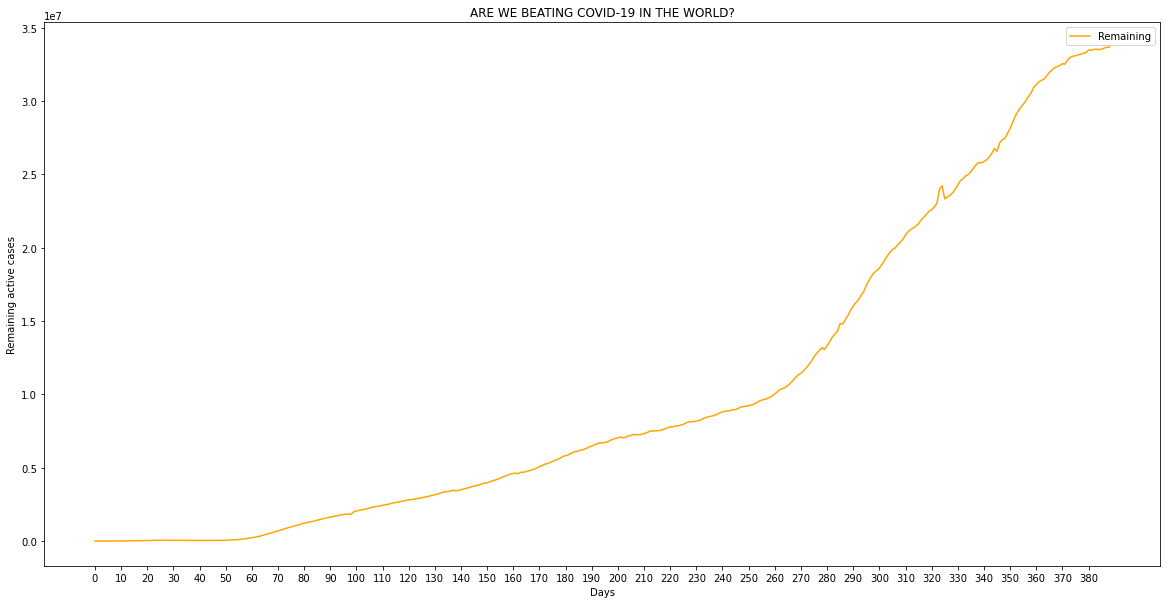

In [4]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')
print("The World still has %0.1f active cases\n"% remaining_by_day[-1])

In [5]:
total_confirmed_df = pd.DataFrame.from_dict(data=all_countries['Confirmed'])
total_fatal_df = pd.DataFrame.from_dict(data=all_countries['Deaths'])
total_recovered_df = pd.DataFrame.from_dict(data=all_countries['Recovered'])
total_remaining_df = total_confirmed_df-total_fatal_df-total_recovered_df
total_remaining_df.tail(1)

,"Korea, South",Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
388,8444.0,4654.0,34461.0,31762.0,488.0,1048.0,219.0,150400.0,4940.0,1869.0,...,3910951.0,5421.0,869.0,0.0,6736.0,631.0,8920.0,90.0,4939.0,3617.0


### Countries are beating COVID most

,388
Congo (Brazzaville),0.0
Marshall Islands,0.0
Vanuatu,0.0
Samoa,0.0
Diamond Princess,0.0
Micronesia,0.0
Congo (Kinshasa),0.0
Tajikistan,0.0
MS Zaandam,0.0
Fiji,0.0


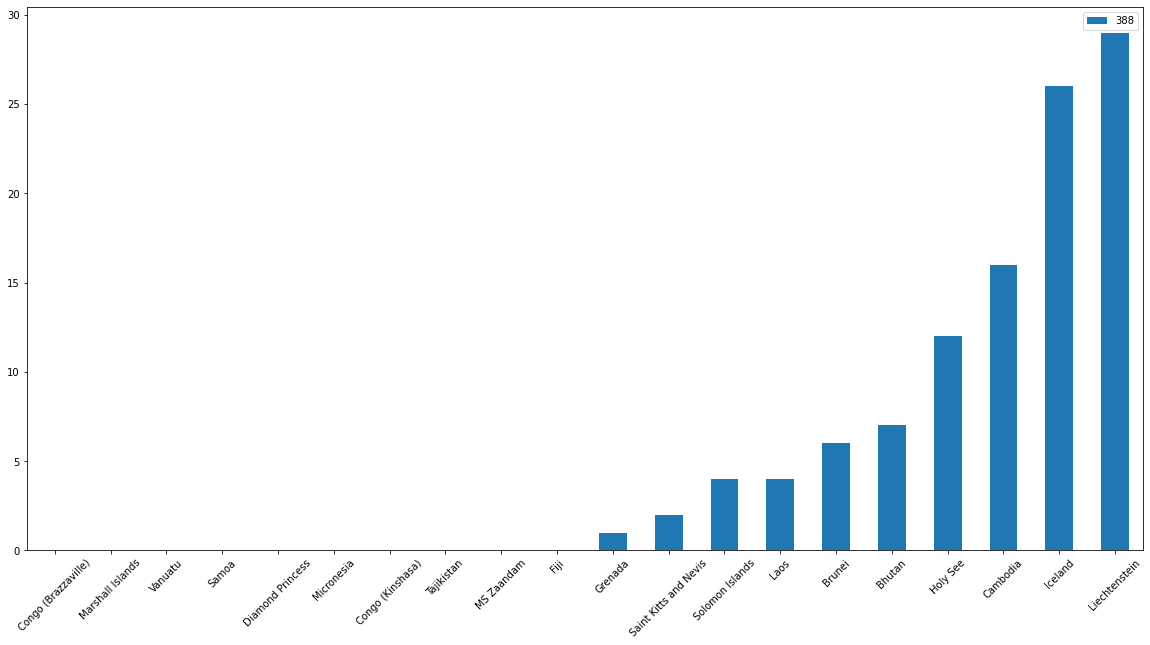

In [6]:
index = total_remaining_df.tail(1)
top_remaining = total_remaining_df.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

Text(0.5, 1.0, 'ARE WE BEATING COVID-19 IN THE WORLD?')

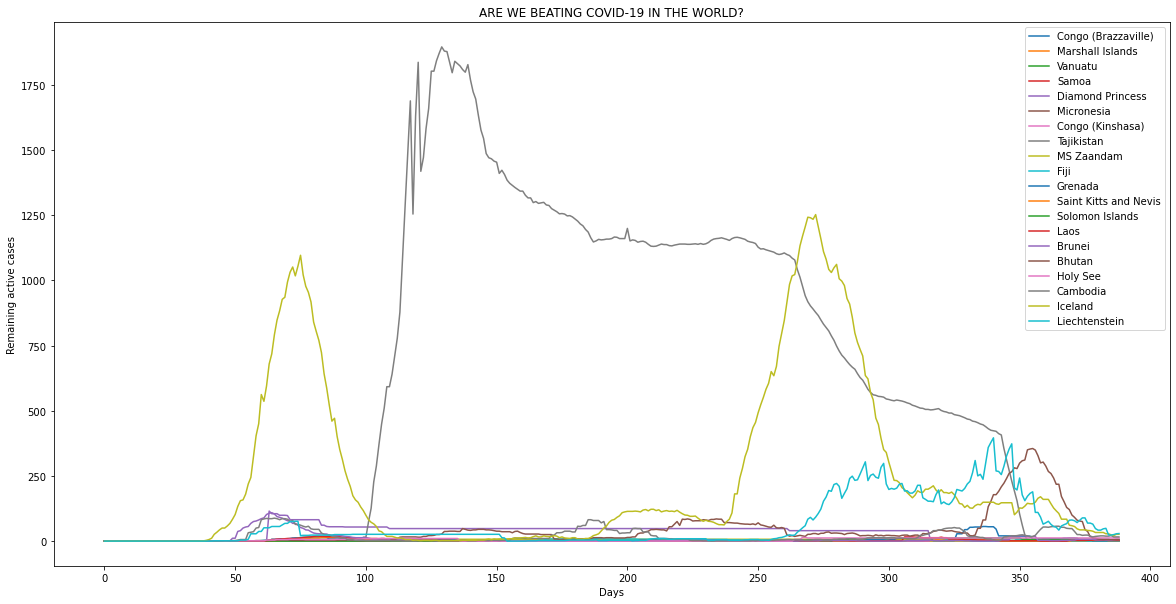

In [7]:
total_remaining_df[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")

### Countries are beating COVID least

,388
US,15480056.0
United Kingdom,3910951.0
France,3141134.0
Spain,2840912.0
Netherlands,1011462.0
Brazil,830777.0
Belgium,715481.0
Sweden,595983.0
Serbia,415279.0
Italy,401413.0


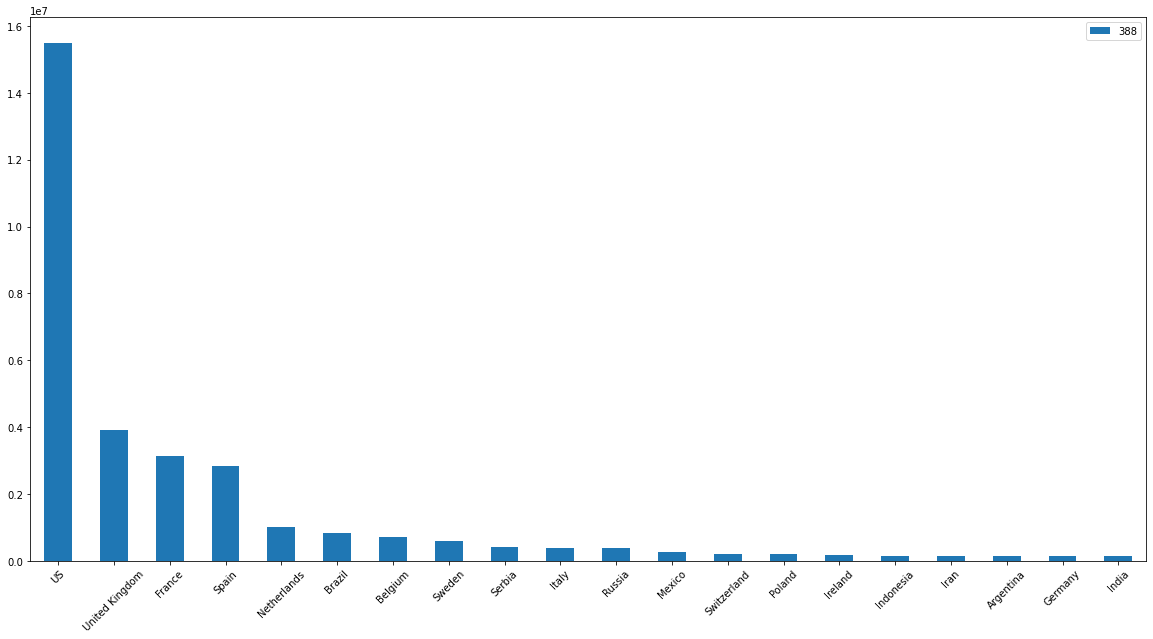

In [8]:
bottom_remaining = total_remaining_df.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'ARE WE BEATING COVID-19 IN THE WORLD?')

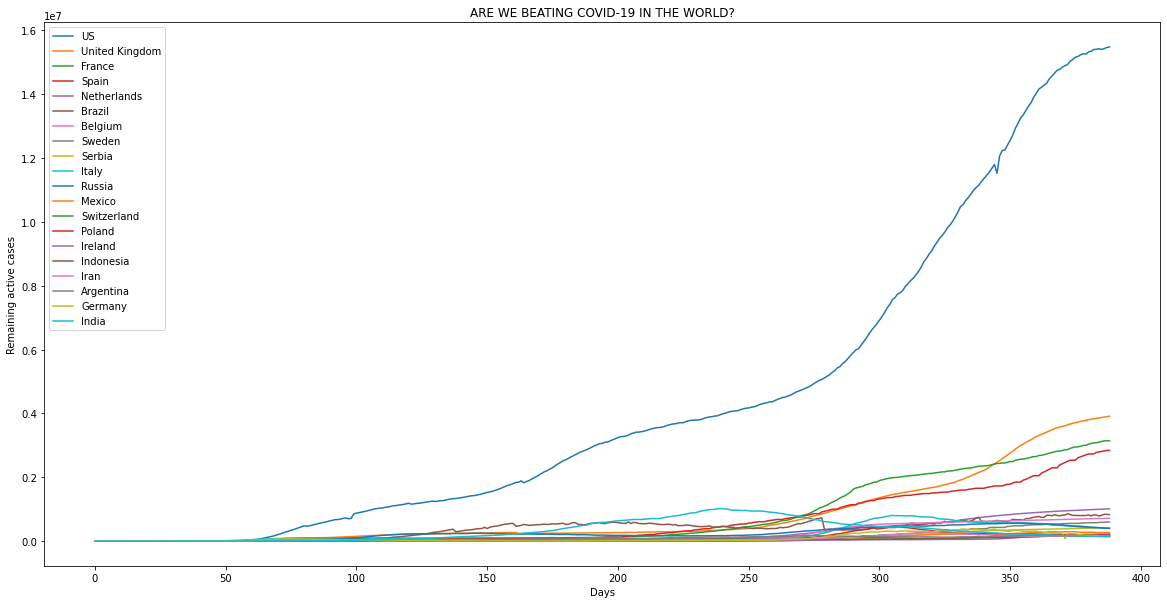

In [9]:
total_remaining_df[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")

In [10]:
# Test
len(totalconfirmed_by_day) == len(totalrecovered_by_day) == len(totalfatalities_by_day), total_confirmed_df['Vietnam'].tail(1) -total_fatal_df['Vietnam'].tail(1)-total_recovered_df['Vietnam'].tail(1) == total_remaining_df['Vietnam'].tail(1), total_remaining_df['Vietnam'].tail(1)

(True,
 388    True
 Name: Vietnam, dtype: bool,
 388    631.0
 Name: Vietnam, dtype: float64)